## Chapter 10  Introduction to Artificial Neural Networks

In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


# Perceptrons

Use `Perceptron` class in scikit-learn to implement a single LTU network.

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

# perceptron classfier 
per_clf = Perceptron(max_iter=100, random_state=42, tol = 1e-3)
per_clf.fit(X, y)

# make prediction on new data 
y_pred = per_clf.predict([[2, 0.5]])

In [4]:
y_pred

array([1])

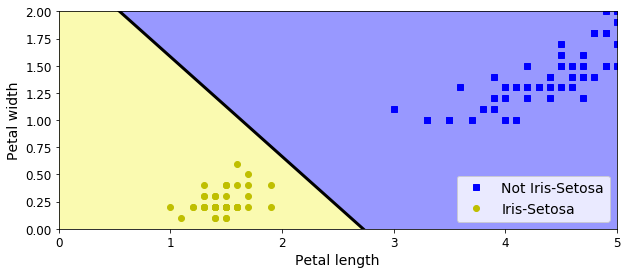

In [5]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

#  Train MLP with Tensorflow's High-Level API with MNIST Data

## Using the Estimator API 

In [6]:
import tensorflow as tf

**Warning**: `tf.examples.tutorials.mnist` is deprecated. We will use `tf.keras.datasets.mnist` instead. Moreover, the `tf.contrib.learn` API was promoted to `tf.estimators` and `tf.feature_columns`, and it has changed considerably. In particular, there is no `infer_real_valued_columns_from_input()` function or `SKCompat` class.

In [8]:
# import data 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [9]:
# DNNClassifier, two hidden layers that have 300 and 100 neurons, respectively
# the softmax output layer has 10 neurons (n_classes)
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)

# train 
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpsnyb6ois', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f15c84c89b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.

INFO:tensorflow:global_step/sec: 323.162
INFO:tensorflow:loss = 7.145199, step = 5501 (0.309 sec)
INFO:tensorflow:global_step/sec: 312.846
INFO:tensorflow:loss = 1.6204392, step = 5601 (0.325 sec)
INFO:tensorflow:global_step/sec: 160.543
INFO:tensorflow:loss = 1.9945819, step = 5701 (0.617 sec)
INFO:tensorflow:global_step/sec: 350.249
INFO:tensorflow:loss = 1.3903301, step = 5801 (0.286 sec)
INFO:tensorflow:global_step/sec: 361.648
INFO:tensorflow:loss = 2.5301032, step = 5901 (0.276 sec)
INFO:tensorflow:global_step/sec: 347.003
INFO:tensorflow:loss = 1.8946849, step = 6001 (0.288 sec)
INFO:tensorflow:global_step/sec: 346.632
INFO:tensorflow:loss = 0.9460623, step = 6101 (0.289 sec)
INFO:tensorflow:global_step/sec: 342.398
INFO:tensorflow:loss = 1.4722493, step = 6201 (0.292 sec)
INFO:tensorflow:global_step/sec: 340.274
INFO:tensorflow:loss = 1.3852226, step = 6301 (0.294 sec)
INFO:tensorflow:global_step/sec: 384.253
INFO:tensorflow:loss = 0.14553382, step = 6401 (0.260 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 332.701
INFO:tensorflow:loss = 0.046139732, step = 13701 (0.300 sec)
INFO:tensorflow:global_step/sec: 344.718
INFO:tensorflow:loss = 0.14466159, step = 13801 (0.291 sec)
INFO:tensorflow:global_step/sec: 347.518
INFO:tensorflow:loss = 0.12037374, step = 13901 (0.287 sec)
INFO:tensorflow:global_step/sec: 370.901
INFO:tensorflow:loss = 0.14383319, step = 14001 (0.270 sec)
INFO:tensorflow:global_step/sec: 381.408
INFO:tensorflow:loss = 0.07665697, step = 14101 (0.262 sec)
INFO:tensorflow:global_step/sec: 356.108
INFO:tensorflow:loss = 0.07104529, step = 14201 (0.281 sec)
INFO:tensorflow:global_step/sec: 356.306
INFO:tensorflow:loss = 0.13602105, step = 14301 (0.281 sec)
INFO:tensorflow:global_step/sec: 382.069
INFO:tensorflow:loss = 0.1218705, step = 14401 (0.262 sec)
INFO:tensorflow:global_step/sec: 375.898
INFO:tensorflow:loss = 0.46235847, step = 14501 (0.266 sec)
INFO:tensorflow:global_step/sec: 353.959
INFO:tensorflow:loss = 0.015572772, step = 14601 (

INFO:tensorflow:global_step/sec: 329.361
INFO:tensorflow:loss = 0.07455066, step = 21801 (0.304 sec)
INFO:tensorflow:global_step/sec: 321.821
INFO:tensorflow:loss = 0.05171781, step = 21901 (0.311 sec)
INFO:tensorflow:global_step/sec: 329.711
INFO:tensorflow:loss = 0.07705471, step = 22001 (0.304 sec)
INFO:tensorflow:global_step/sec: 191.768
INFO:tensorflow:loss = 0.048852623, step = 22101 (0.526 sec)
INFO:tensorflow:global_step/sec: 209.694
INFO:tensorflow:loss = 0.05701955, step = 22201 (0.472 sec)
INFO:tensorflow:global_step/sec: 303.683
INFO:tensorflow:loss = 0.14350533, step = 22301 (0.330 sec)
INFO:tensorflow:global_step/sec: 331.544
INFO:tensorflow:loss = 0.030029021, step = 22401 (0.301 sec)
INFO:tensorflow:global_step/sec: 184.152
INFO:tensorflow:loss = 0.033770088, step = 22501 (0.542 sec)
INFO:tensorflow:global_step/sec: 369.536
INFO:tensorflow:loss = 0.036020547, step = 22601 (0.274 sec)
INFO:tensorflow:global_step/sec: 312.876
INFO:tensorflow:loss = 0.012464901, step = 227

INFO:tensorflow:global_step/sec: 308.327
INFO:tensorflow:loss = 0.0019752118, step = 29901 (0.325 sec)
INFO:tensorflow:global_step/sec: 303.444
INFO:tensorflow:loss = 0.05137489, step = 30001 (0.329 sec)
INFO:tensorflow:global_step/sec: 268.728
INFO:tensorflow:loss = 0.010190672, step = 30101 (0.372 sec)
INFO:tensorflow:global_step/sec: 262.92
INFO:tensorflow:loss = 0.03780338, step = 30201 (0.382 sec)
INFO:tensorflow:global_step/sec: 356.956
INFO:tensorflow:loss = 0.007381497, step = 30301 (0.278 sec)
INFO:tensorflow:global_step/sec: 284.98
INFO:tensorflow:loss = 0.029374255, step = 30401 (0.355 sec)
INFO:tensorflow:global_step/sec: 290.597
INFO:tensorflow:loss = 0.020209592, step = 30501 (0.340 sec)
INFO:tensorflow:global_step/sec: 314.937
INFO:tensorflow:loss = 0.022499297, step = 30601 (0.318 sec)
INFO:tensorflow:global_step/sec: 336.21
INFO:tensorflow:loss = 0.025752261, step = 30701 (0.299 sec)
INFO:tensorflow:global_step/sec: 319.176
INFO:tensorflow:loss = 0.027476706, step = 30

INFO:tensorflow:global_step/sec: 359.949
INFO:tensorflow:loss = 0.005207114, step = 38001 (0.278 sec)
INFO:tensorflow:global_step/sec: 345.865
INFO:tensorflow:loss = 0.0075706816, step = 38101 (0.290 sec)
INFO:tensorflow:global_step/sec: 366.155
INFO:tensorflow:loss = 0.0040492197, step = 38201 (0.272 sec)
INFO:tensorflow:global_step/sec: 346
INFO:tensorflow:loss = 0.018584551, step = 38301 (0.289 sec)
INFO:tensorflow:global_step/sec: 338.527
INFO:tensorflow:loss = 0.022801865, step = 38401 (0.295 sec)
INFO:tensorflow:global_step/sec: 343.948
INFO:tensorflow:loss = 0.0057854746, step = 38501 (0.292 sec)
INFO:tensorflow:global_step/sec: 345.827
INFO:tensorflow:loss = 0.005664403, step = 38601 (0.288 sec)
INFO:tensorflow:global_step/sec: 327.137
INFO:tensorflow:loss = 0.004765933, step = 38701 (0.306 sec)
INFO:tensorflow:global_step/sec: 336.688
INFO:tensorflow:loss = 0.039980516, step = 38801 (0.297 sec)
INFO:tensorflow:global_step/sec: 331.948
INFO:tensorflow:loss = 0.019278046, step =

In [10]:
# validation
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)

eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-30T22:49:15Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmpsnyb6ois/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-30-22:49:16
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9798, average_loss = 0.10061715, global_step = 44000, loss = 12.736347
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: /tmp/tmpsnyb6ois/model.ckpt-44000


In [11]:
eval_results

{'accuracy': 0.9798,
 'average_loss': 0.10061715,
 'loss': 12.736347,
 'global_step': 44000}

In [12]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
# the first prediction 
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpsnyb6ois/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([ -4.695478 ,  -2.2918456,  -1.8766023,   8.151772 , -11.502902 ,
         -5.0879574, -15.919097 ,  22.496662 ,  -1.4286348,   1.6498773],
       dtype=float32),
 'probabilities': array([1.5509690e-12, 1.7158832e-11, 2.5991152e-11, 5.8896967e-07,
        1.7146528e-15, 1.0474943e-12, 2.0713196e-17, 9.9999940e-01,
        4.0679477e-11, 8.8380459e-10], dtype=float32),
 'class_ids': array([7]),
 'classes': array([b'7'], dtype=object)}

## Using plain TensorFlow

In [13]:
# on the MNIST data 
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [14]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [15]:
# function to create one layer at a time 
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        # find the number of inputs 
        n_inputs = int(X.get_shape()[1])
        
        # initialize the weight matrix with random variables from truncated normal distribution with 
        # sd = 2 / sqrt(n)
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        
        # we call the weight matrix the layer's kernel 
        W = tf.Variable(init, name="kernel")
        
        # create bias initialized as zero for each neuron 
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        
        # z vector  
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [16]:
# create a deep neural network 
with tf.name_scope("dnn"):
    # first layer takes X as input 
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    # second layer 
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    # third layer
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [17]:
# loss function 
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    # compute mean cross entropy over all instances 
    loss = tf.reduce_mean(xentropy, name="loss")

In [25]:
# optimize function to minimize the loss function 
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [26]:
# specify how to evaluate the model
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [27]:
# create a node to initilize all variables 
init = tf.global_variables_initializer()
# create a Saver to save trained model parameters to disk 
saver = tf.train.Saver()

In [28]:
# execution phase 
n_epochs = 40
batch_size = 50

In [29]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [23]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Val accuracy: 0.9146
1 Batch accuracy: 0.92 Val accuracy: 0.936
2 Batch accuracy: 0.96 Val accuracy: 0.9448
3 Batch accuracy: 0.92 Val accuracy: 0.951
4 Batch accuracy: 0.98 Val accuracy: 0.9558
5 Batch accuracy: 0.96 Val accuracy: 0.9566
6 Batch accuracy: 1.0 Val accuracy: 0.9612
7 Batch accuracy: 0.96 Val accuracy: 0.9632
8 Batch accuracy: 0.98 Val accuracy: 0.9648
9 Batch accuracy: 0.96 Val accuracy: 0.9662
10 Batch accuracy: 0.92 Val accuracy: 0.9686
11 Batch accuracy: 0.98 Val accuracy: 0.9688
12 Batch accuracy: 0.98 Val accuracy: 0.9666
13 Batch accuracy: 0.98 Val accuracy: 0.9706
14 Batch accuracy: 1.0 Val accuracy: 0.9712
15 Batch accuracy: 0.94 Val accuracy: 0.9732
16 Batch accuracy: 1.0 Val accuracy: 0.9732
17 Batch accuracy: 1.0 Val accuracy: 0.9742
18 Batch accuracy: 1.0 Val accuracy: 0.9748
19 Batch accuracy: 0.98 Val accuracy: 0.9744
20 Batch accuracy: 1.0 Val accuracy: 0.9748
21 Batch accuracy: 1.0 Val accuracy: 0.976
22 Batch accuracy: 0.98 Val acc

In [30]:
# use the NN for prediction 
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [31]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [32]:
from tensorflow_graph_in_jupyter import show_graph

In [33]:
show_graph(tf.get_default_graph())

### Use tensorflow's built-in `tf.layers.dense()` function to create layers 

In [34]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [35]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

In [36]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    # softmax probability for output layers
    y_proba = tf.nn.softmax(logits)

Instructions for updating:
Use keras.layers.dense instead.


In [37]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [38]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [39]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [40]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [41]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Validation accuracy: 0.9024
1 Batch accuracy: 0.92 Validation accuracy: 0.9254
2 Batch accuracy: 0.94 Validation accuracy: 0.9372
3 Batch accuracy: 0.9 Validation accuracy: 0.9416
4 Batch accuracy: 0.94 Validation accuracy: 0.947
5 Batch accuracy: 0.94 Validation accuracy: 0.951
6 Batch accuracy: 1.0 Validation accuracy: 0.9548
7 Batch accuracy: 0.94 Validation accuracy: 0.9612
8 Batch accuracy: 0.96 Validation accuracy: 0.9622
9 Batch accuracy: 0.94 Validation accuracy: 0.965
10 Batch accuracy: 0.92 Validation accuracy: 0.9654
11 Batch accuracy: 0.98 Validation accuracy: 0.9668
12 Batch accuracy: 0.98 Validation accuracy: 0.9686
13 Batch accuracy: 0.98 Validation accuracy: 0.9702
14 Batch accuracy: 1.0 Validation accuracy: 0.9696
15 Batch accuracy: 0.94 Validation accuracy: 0.9718
16 Batch accuracy: 0.98 Validation accuracy: 0.9728
17 Batch accuracy: 1.0 Validation accuracy: 0.9728
18 Batch accuracy: 0.98 Validation accuracy: 0.975
19 Batch accuracy: 0.98 Validat

In [42]:
show_graph(tf.get_default_graph())